# Table of Contents
1. Problem Definition
2. Load Data and Split Data for train and test
3. Exploring Data Analysis
   - 3.1 Descriptive Analysis
   - 3.2 Data Visualisation
4. Data Preparation
5. Select and Train Models
6. Model Evaluation
7. Finalise Model and Predict
   - 7.1 Finalise Model
   - 7.2 Make Prediciton
   - 7.3 Save prediction into a csv filezip file.



# 1. Project Definition
This project aims to develop an AI-enhanced fall detection system to address the significant risks falls pose to the elderly in homes and care facilities.  By integrating machine learning algorithms with sensor data and possible computer vision, the project seeks to detect falls in real time and automatically alert caregivers or emergency services.  Using AI/ML techniques is central to providing rapid response and potentially life-saving intervention, enhancing the safety and quality of life for older adults by leveraging technology advancements in fall detection.

In [84]:
# 2. Load data and Split Data for Train and Test
import pandas as pd

# Load dataset containing sensor and health data relevant for fall detection
df = pd.read_csv('datasets/originaldataset.csv')

# Print column names to understand the dataset structure
print(df.columns)

Index(['Distance', 'Pressure', 'HRV', 'Sugar level', 'SpO2', 'Accelerometer',
       'Decision'],
      dtype='object')


In [85]:
from sklearn.model_selection import train_test_split

# Split the dataset into features X and target y
# 'Decision' indicates whether a fall occurred (1) or not (0)
X = df.drop('Decision', axis=1) 
y = df['Decision']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 3. Exploring Data Analysis

In [86]:
# 3.1 Descriptive Analysis
# Display descriptive statistics of the dataset
print(df.describe())

          Distance     Pressure          HRV  Sugar level         SpO2  \
count  2039.000000  2039.000000  2039.000000  2039.000000  2039.000000   
mean     28.694527     0.988720    95.657002    72.909243    83.563649   
std      23.773644     0.815918    17.576499    46.940110    11.111592   
min       0.000000     0.000000    60.000000    10.000000    60.000000   
25%       7.642500     0.000000    82.418000    40.230000    75.285000   
50%      20.560000     1.000000    97.238000    69.960000    85.280000   
75%      55.205500     2.000000   109.695000    77.612500    92.692500   
max      69.981000     2.000000   124.980000   179.293000    99.990000   

       Accelerometer     Decision  
count    2039.000000  2039.000000  
mean        0.661599     0.988720  
std         0.473282     0.815918  
min         0.000000     0.000000  
25%         0.000000     0.000000  
50%         1.000000     1.000000  
75%         1.000000     2.000000  
max         1.000000     2.000000  


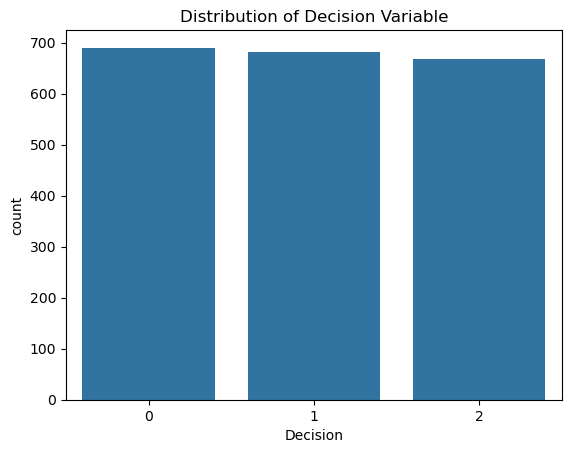

In [87]:
# 3.2 Data Visualisation
# Visualise the distribution of the 'Decision' variable to understand the balance or imbalance between fall and non-fall instances.

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.countplot(x='Decision', data=df)
plt.title('Distribution of Decision Variable')
plt.show()

# 4. Data Preparation

In [88]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Define numeric and categorical features for preprocessing
numeric_features = ['Distance', 'HRV', 'Sugar level', 'SpO2', 'Accelerometer']
categorical_features = ['Pressure']

# Numeric transformer pipeline for handling missing values and scaling
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler())]) 

# Categorical transformer pipeline for handling missing values and applying one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore'))]) 

# Combining preprocessing steps into a single transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features), # Apply numeric transformer to numeric features
        ('cat', categorical_transformer, categorical_features)]) # Apply categorical transformer to categorical features

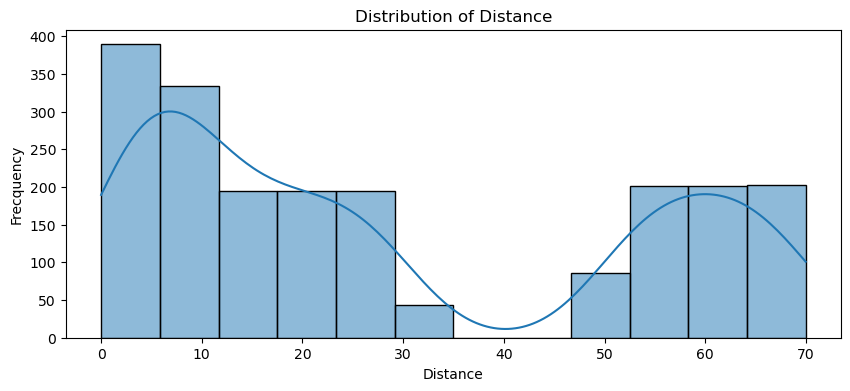

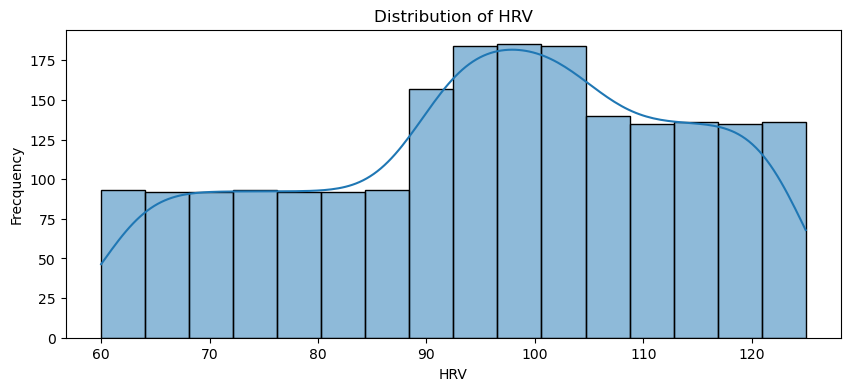

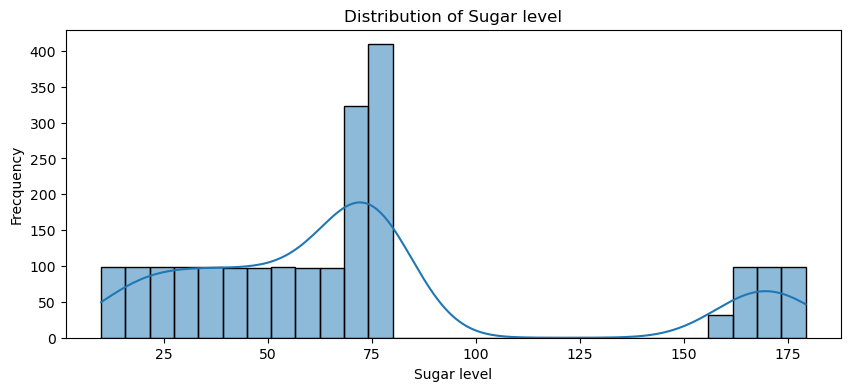

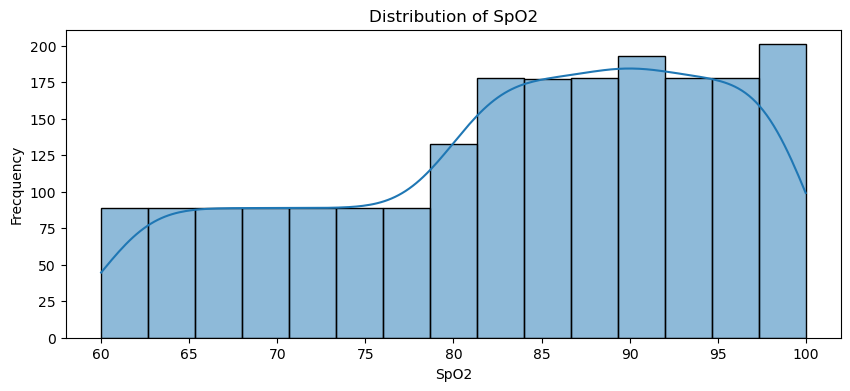

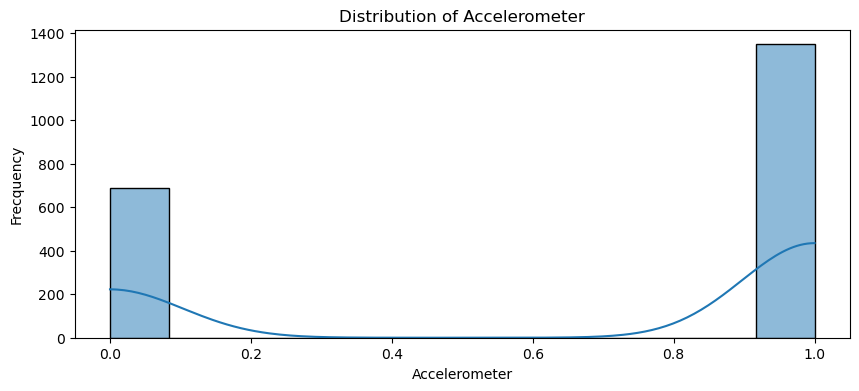

In [89]:
# Distribution plots for numerical features 
for column in numeric_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frecquency')
    plt.show()

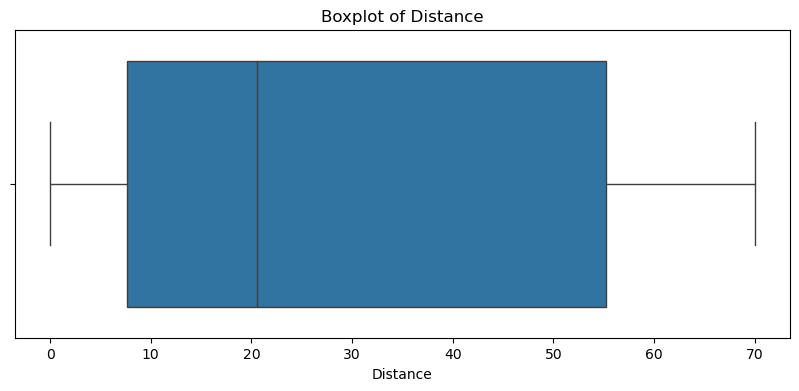

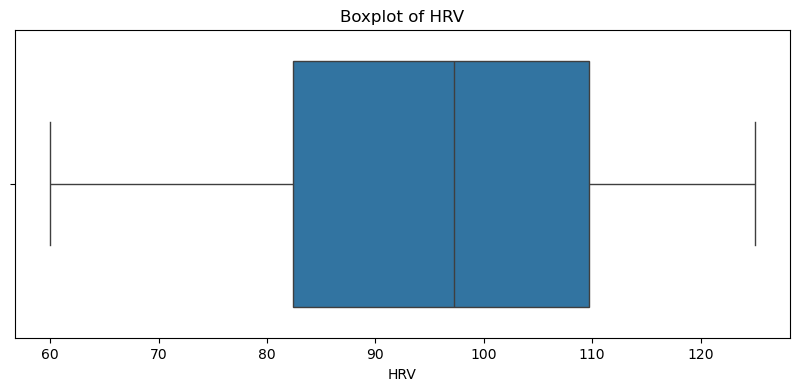

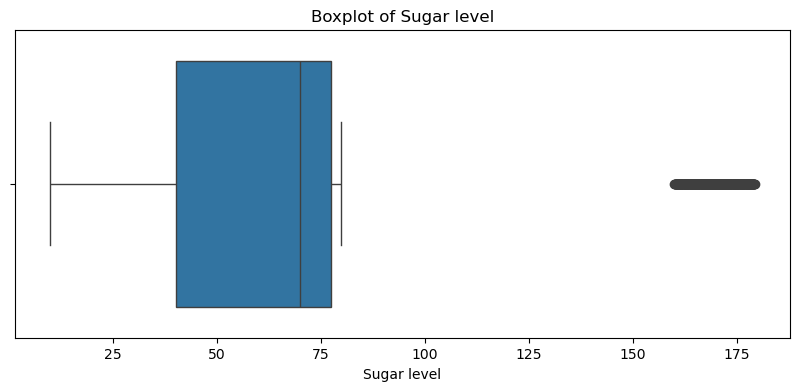

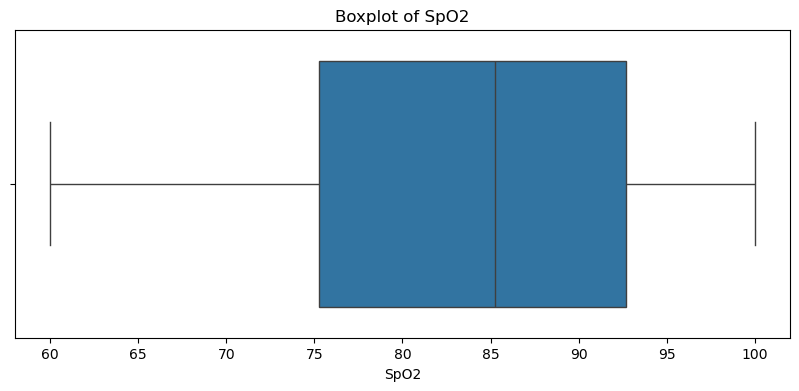

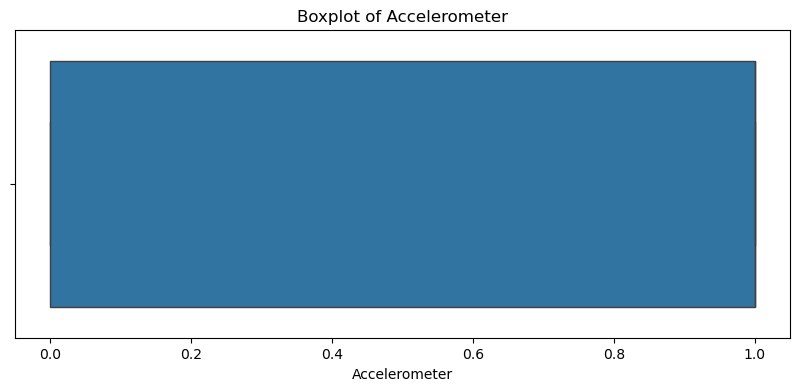

In [90]:
# Box plots to identify outliers
for column in numeric_features:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [91]:
# Handling outliers
q_low = df['Distance'].quantile(0.01)
q_hi = df['Distance'].quantile(0.99)

df_filtered = df[(df['Distance'] > q_low) & (df['Distance'] < q_hi)]

In [92]:
# Categorical encoding to Pressure using 
df_encoded = pd.get_dummies(df_filtered, columns=['Pressure'], prefix='Pressure')

# 5. Select and Train Models

In [93]:
# Train Random Forest and Gradient Boosting models.
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Setting up pipelines for Random Forest and Gradient Boosting classifiers
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier())])

gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', GradientBoostingClassifier())])

# Training the models
rf_pipeline.fit(X_train, y_train)
gb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Distance', 'HRV',
                                                   'Sugar level', 'SpO2',
                                                   'Accelerometer']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pressure'])])),
                ('classifier', GradientBoostingClassifier())])

# 6. Model Evaluation

In [94]:
# Evaluating the models using classification reports to compare their performance on the test set
from sklearn.metrics import classification_report

y_pred_rf = rf_pipeline.predict(X_test)
print("Random Forest Classifier Report")
print(classification_report(y_test, y_pred_rf))

y_pred_gb = gb_pipeline.predict(X_test)
print("Gradient Boosting Classifier Report")
print(classification_report(y_test, y_pred_gb))

Random Forest Classifier Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       151
           2       1.00      1.00      1.00       136

    accuracy                           1.00       408
   macro avg       1.00      1.00      1.00       408
weighted avg       1.00      1.00      1.00       408

Gradient Boosting Classifier Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       151
           2       1.00      1.00      1.00       136

    accuracy                           1.00       408
   macro avg       1.00      1.00      1.00       408
weighted avg       1.00      1.00      1.00       408



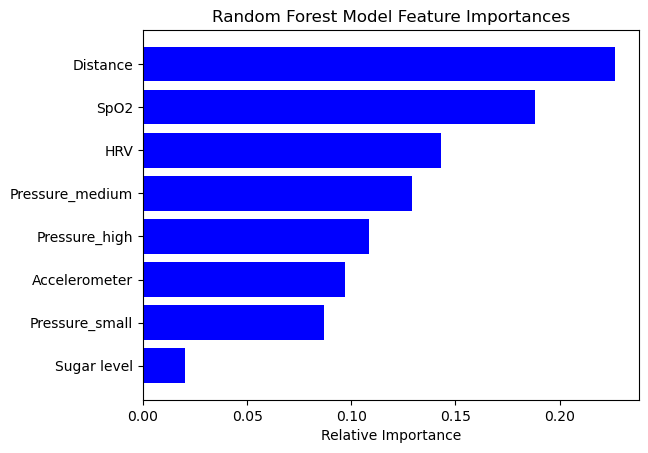

In [95]:
# Assuming rf_pipeline is your Random Forest and 'classifier' is the name of the RandomeForestClassifier step
feature_importances_rf = rf_pipeline.named_steps['classifier'].feature_importances_
features = numeric_features + ['Pressure_small', 'Pressure_medium', 'Pressure_high']

indices_rf = np.argsort(feature_importances_rf)

plt.title('Random Forest Model Feature Importances')
plt.barh(range(len(feature_importances_rf)), feature_importances_rf[indices_rf], color='b', align='center')
plt.yticks(range(len(feature_importances_rf)), [features[i] for i in indices_rf])
plt.xlabel('Relative Importance')
plt.show()

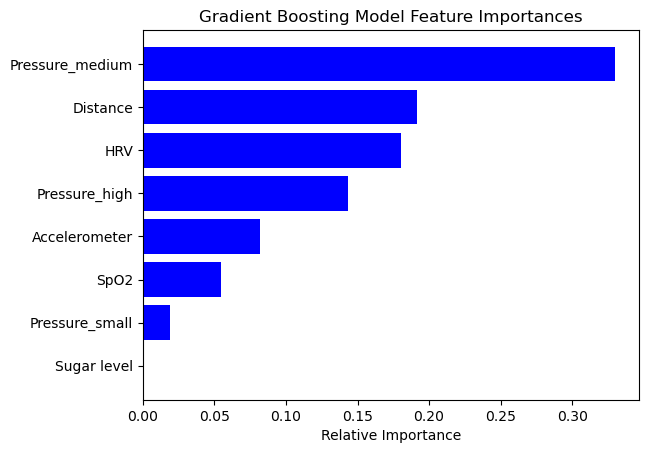

In [96]:
# Assuming gb_pipeline is your Gradient Boosing pipeline
feature_importances_gb = gb_pipeline.named_steps['classifier'].feature_importances_

indices_gb = np.argsort(feature_importances_gb)

plt.title('Gradient Boosting Model Feature Importances')
plt.barh(range(len(indices_gb)), feature_importances_gb[indices_gb], color='b', align='center')
plt.yticks(range(len(indices_gb)), [features[i] for i in indices_gb])
plt.xlabel('Relative Importance')
plt.show()

In [97]:
# Model selection justification
from sklearn.metrics import accuracy_score, f1_score

# Calculate performance metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
f1_score_rf = f1_score(y_test, y_pred_rf, average='weighted')
f1_score_gb = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Random Forest Accuracy: {accuracy_rf}, F1 score: {f1_score_rf}")
print(f"Gradient Boosting Accuracy: {accuracy_gb}, F1 score: {f1_score_gb}")

Random Forest Accuracy: 1.0, F1 score: 1.0
Gradient Boosting Accuracy: 1.0, F1 score: 1.0


# 7. Finalise Model and Predict

In [98]:
# 7.1 & 7.2 Finalising the model based on evaluation metrics and using it to make predictions on the test set.
# The chosen model is then used to predict fall events
final_model = rf_pipeline # Assuming RF performed better based on previous evaluations
final_predictions = final_model.predict(X_test)

In [99]:
# 7.3 Save the final predicitons to a CSV file
# This output can be used in real-world applicatoins to alert caregivers or medical staff of potential fall events. 
final_predictions_df = pd.DataFrame(final_predictions, columns=['Predicted_Fall'])
final_predictions_df.to_csv('datasets/final_predictions.csv', index=False)